# <center>System of Linear Equations</center>
## <center>Norm, condition number</center>

In [1]:
N=10;
A=diag(ones(N,1))+triu(-ones (N), 1)
b=[N-2:-1:0];
b=[-b 1]';
x=A\b;
max(x);

A =

   1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   0   1  -1  -1  -1  -1  -1  -1  -1  -1
   0   0   1  -1  -1  -1  -1  -1  -1  -1
   0   0   0   1  -1  -1  -1  -1  -1  -1
   0   0   0   0   1  -1  -1  -1  -1  -1
   0   0   0   0   0   1  -1  -1  -1  -1
   0   0   0   0   0   0   1  -1  -1  -1
   0   0   0   0   0   0   0   1  -1  -1
   0   0   0   0   0   0   0   0   1  -1
   0   0   0   0   0   0   0   0   0   1



In [3]:
b=[N-2:-1:0];
b=[-b 1.0001]'; %% Changing the last component of the vector
x=A\b
max(x)

x =

   1.0256
   1.0128
   1.0064
   1.0032
   1.0016
   1.0008
   1.0004
   1.0002
   1.0001
   1.0001

ans =  1.0256


In [7]:
x=[-4 1 8]'
norm(x,1)
norm(x,2)
norm(x,'inf')

x =

  -4
   1
   8

ans =  13
ans =  9
ans =  8


###  Unit ball of the plane for $p=1,2\ \infty$

<img src="unitballs.png" width="870">



In [58]:
% Showing the MATLAB animation for general p

In [10]:
A=[-4 3 4; 5 11 -12; 0 1 6]
norm(A,1)
norm(A,'inf')

A =

   -4    3    4
    5   11  -12
    0    1    6

ans =  22
ans =  28


In [17]:
A=[3 -1; -2 2]
norm(A,2)

A =

   3  -1
  -2   2

ans =  4.1306


In [2]:
A=[1 1; 1 1.01]
cond(A,1)
cond(A,2)
cond(A,'inf')

A =

   1.0000   1.0000
   1.0000   1.0100

ans =  404.01
ans =  402.01
ans =  404.01


In [34]:
N=32;
A=diag(ones(N,1))+triu(-ones (N), 1);
cond(A,1)
cond(A,2)
cond(A,'inf')

ans =  68719476736
ans =  27877422859.77620
ans =  68719476736


In [1]:
A=[1 1; 1 1.01];
b=[2 2.01]';
delta_b=[0 0.1]';
first_1=cond(A,1)*norm(delta_b,1)/norm(b,1)
first_2=cond(A,2)*norm(delta_b,2)/norm(b,2)
first_inf=cond(A,'inf')*norm(delta_b,'inf')/norm(b,'inf')

N=32; A=diag(ones(N,1))+triu(-ones (N), 1);
b=[N-2:-1:0]; b=[-b 1]';
delta_b=[zeros(1,N-1) 0.0001]';
second_1=cond(A,1)*norm(delta_b,1)/norm(b,1)
second_2=cond(A,2)*norm(delta_b,2)/norm(b,2)
second_inf=cond(A,'inf')*norm(delta_b,'inf')/norm(b,'inf')

first_1 =  10.075
first_2 =  14.178
first_inf =  20.100
second_1 =  14746.66883
second_2 =  28668.09870
second_inf =  229064.92245


## <center>Direct methods for solving system of linear equations</center>

   2.00   0.00
   4.00   0.00
   8.00   0.00
   16.00    0.00
   32.00    0.00
   64.00    0.00
   128.00     0.00
   256.00     0.01
   512.00     0.03
   1024.00      0.14
   2048.00      0.48
   4096.00      2.82
   8192.00     18.02
   16384.00     266.09


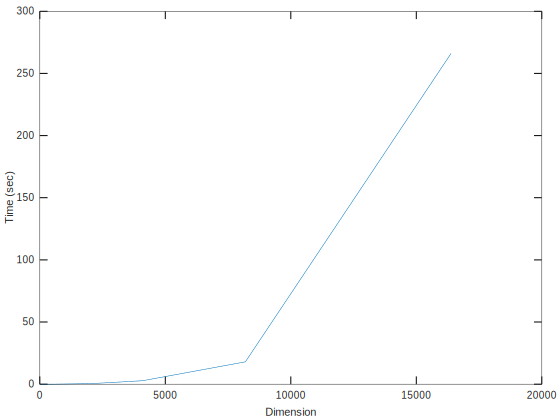

In [2]:
format bank
for j=1:14
    N=2^j;
    A=randn(N);
    tic
    A\ones(N,1);
    t=toc;
    disp([N,t]);
    dim(j)=N;
    time(j)=t;
end
plot(dim,time,'-')
xlabel('Dimension')
ylabel('Time (sec)')

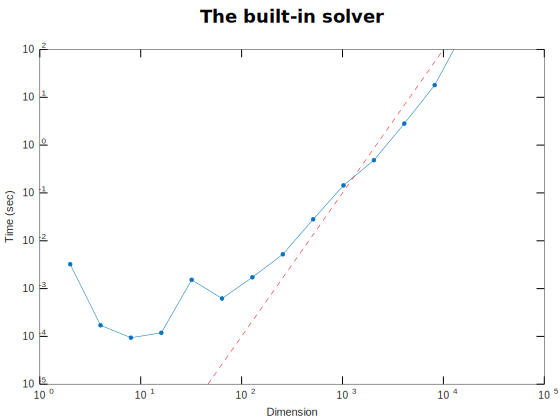

In [9]:
loglog(dim,time,'.-')
hold on 
loglog(dim,1e-10*dim.^3, 'r--')
ylim([1e-5 1e2])
xlabel('Dimension')
ylabel('Time (sec)')
title('The built-in solver','fontsize',18)
% gtext('N^3','fontsize',18,'color','k') % Add this line if you have MATLAB

<a href="https://www.top500.org/system/178513">Official link for Hungarian supercomputer located in Debrecen on TOP500 website</a>

<br>

<div style="width:870 px"></div>
<div style="float:left"><img src="db2_building_front.jpg" width="350"/></div>
<div style="float:left"><img src="db2_1.jpg" width="500"/></div>
<div style="clear:both"></div> 
<br>
<br> 

In [9]:
% Cholesky-decomposition
A=[5 7 3; 7 11 2; 3 2 6]
eig(A)
L=[1 0 0; 7/5 1 0; 3/5 -11/6 1]
U=[5 7 3; 0 6/5 -11/5; 0 0 1/6]
diag(diag(U))*L'

A =

    5.00    7.00    3.00
    7.00   11.00    2.00
    3.00    2.00    6.00

ans =

    0.01
    5.33
   16.66

L =

   1.00   0.00   0.00
   1.40   1.00   0.00
   0.60  -1.83   1.00

U =

   5.00   7.00   3.00
   0.00   1.20  -2.20
   0.00   0.00   0.17

ans =

   5.00   7.00   3.00
   0.00   1.20  -2.20
   0.00   0.00   0.17



<br>

Solving the system $Ax=b$ by using the direct solver <a href="https://www.mathworks.com/help/matlab/ref/mldivide.html">backslah</a>, i.e. $x=A \backslash b$
<br>
Dense matrix case
<img src="backslahteli.png" width="400">
<br>
Sparse matrix case
<img src="backslahritka.png" width="400">

<br>